# 주제2 : Top5 아티스트의 기간별 순위권 진입 횟수를 보여주는 plot 그래프를 생성

1. 아티스트별 순위권 진입 횟수를 확인한다
2. 순위권 진입 Top5 아티스트의 날짜별 순위권 진입 횟수를 확인
3. 새로운 xlsx 파일을 생성 후 해당 파일로 그래프를 생성

패키지 삽입

In [1]:
from pandas import read_excel, DataFrame, pivot_table
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sb
import sys

데이터 가져오기

In [2]:
# 동일 폴더에 있는 genie_chart.xlsx 데이터 추출
xlsx = read_excel("C:\\Users\\jehyu\\Desktop\\SemiProject2\\main\\벅스일간차트_0601-0629.xlsx")
xlsx

,순위,날짜,곡명,아티스트,앨범명
0,1,20230601,퀸카 (Queencard),(여자)아이들,I feel
1,2,20230601,Spicy,aespa,MY WORLD - The 3rd Mini Album
2,3,20230601,I AM,IVE (아이브),I've IVE
3,4,20230601,UNFORGIVEN (feat. Nile Rodgers),LE SSERAFIM (르세라핌),UNFORGIVEN
4,5,20230601,Kitsch,IVE (아이브),I've IVE
...,...,...,...,...,...
2895,96,20230629,NOT SORRY (Feat. pH-1) (Prod. by Slom),이영지,쇼미더머니 11 Episode 3
2896,97,20230629,10X,SHINee (샤이니),HARD - The 8th Album
2897,98,20230629,딱 10CM만,10CM\n\n\n10CM,딱 10CM만
2898,99,20230629,The Feeling,SHINee (샤이니),HARD - The 8th Album


## 1. 아티스트별 순위권 진입 횟수를 확인

추출 목표인 순위에 진입한 숫자가 많은 상위 5개 아티스트를 확인

아티스트별 순위권 진입 횟수를 확인

In [3]:
xlsxCount = xlsx['아티스트'].value_counts()
xlsxCount

아티스트
IVE (아이브)             145
NewJeans              145
aespa                 122
(여자)아이들               116
LE SSERAFIM (르세라핌)    116
                     ... 
EXO                     2
임한별                     2
프로미스나인                  2
거미                      1
Teddy Swims             1
Name: count, Length: 87, dtype: int64

head를 사용해 순위진입 횟수 상위 5위 아티스트를 시각화

In [4]:
xlsx1 = xlsxCount.head(5)
xlsx1

아티스트
IVE (아이브)             145
NewJeans              145
aespa                 122
(여자)아이들               116
LE SSERAFIM (르세라핌)    116
Name: count, dtype: int64

[IVE (아이브), NewJeans, aespa, (여자)아이들, LE SSERAFIM (르세라핌)]의 날짜별 순위권 진입 횟수 확인

없으면 0

## 2.순위권 진입 Top5 아티스트의 날짜별 순위권 진입 횟수를 추출

In [5]:
df = xlsx.query("아티스트 == 'IVE (아이브)' or 아티스트 == 'NewJeans' or 아티스트 == 'aespa' or 아티스트 == '(여자)아이들' or 아티스트 == 'LE SSERAFIM (르세라핌)'")
df1 = df.filter(['날짜', '아티스트'])
df1.reset_index(drop=True, inplace=True)
df1

,날짜,아티스트
0,20230601,(여자)아이들
1,20230601,aespa
2,20230601,IVE (아이브)
3,20230601,LE SSERAFIM (르세라핌)
4,20230601,IVE (아이브)
...,...,...
639,20230629,(여자)아이들
640,20230629,aespa
641,20230629,NewJeans
642,20230629,aespa


### 날짜별 아티스트의 언급 횟수를 구하고 새로운 컬럼 생성

In [6]:
artist_counts = df1.groupby(['날짜','아티스트']).size().reset_index(name='순위진입횟수')
# artist_counts.set_index('날짜', inplace=True)
artist_counts.reset_index()
# artist_counts

,index,날짜,아티스트,순위진입횟수
0,0,20230601,(여자)아이들,4
1,1,20230601,IVE (아이브),5
2,2,20230601,LE SSERAFIM (르세라핌),4
3,3,20230601,NewJeans,5
4,4,20230601,aespa,6
...,...,...,...,...
140,140,20230629,(여자)아이들,4
141,141,20230629,IVE (아이브),5
142,142,20230629,LE SSERAFIM (르세라핌),4
143,143,20230629,NewJeans,5


#### 아티스트를 분리해 데이터를 생성

In [7]:
artist1 = artist_counts.query("아티스트 == 'IVE (아이브)'")
# artist1

In [8]:
artist2 = artist_counts.query("아티스트 == 'NewJeans'")
# artist2

In [9]:
artist3 = artist_counts.query("아티스트 == 'aespa'")
# artist3

In [10]:
artist4 = artist_counts.query("아티스트 == '(여자)아이들'")
# artist4

In [11]:
artist5 = artist_counts.query("아티스트 == 'LE SSERAFIM (르세라핌)'")
# artist5

## 3. 새로운 xlsx 파일을 생성 후 해당 파일로 히스토그램으로 표현

In [12]:
# artist_counts.to_excel("main2.xlsx")

`bins`로 구간의 정보(갯수)를 설정

기준은 날짜

In [13]:
hist1, bins1 = np.histogram(artist1['날짜'], bins=10)
hist2, bins2 = np.histogram(artist2['날짜'], bins=10)
hist3, bins3 = np.histogram(artist3['날짜'], bins=10)
hist4, bins4 = np.histogram(artist4['날짜'], bins=10)
hist5, bins5 = np.histogram(artist4['날짜'], bins=10)

In [14]:
# print(hist1)
# print(bins1)

In [15]:
# print(hist5)
# print(bins5)

조회 결과를 도수분포표로 생성

In [16]:
artists = [artist1, artist2, artist3, artist4, artist5]
hist_artists = []

for artist in artists:
    hist, bins = np.histogram(artist['날짜'], bins=10)
    info = []
    
    for i, v in enumerate(hist):
        if i + 1 < len(hist):
            tpl = "%d이상 %d미만"
        else:
            tpl = "%d이상 %d이하"

        cls = tpl % (bins[i], bins[i+1])
        line = {"기간": cls, "도수": v}
        info.append(line)
    
    hist_artist = DataFrame(info)
    hist_artist.set_index('기간', inplace=True)
    hist_artists.append(hist_artist)
# hist_artists

5개의 히스토그램 생성

In [17]:
hist_artist1 = hist_artists[0]  # artist1에 대한 히스토그램 결과
hist_artist2 = hist_artists[1]  # artist2에 대한 히스토그램 결과
hist_artist3 = hist_artists[2]  # artist3에 대한 히스토그램 결과
hist_artist4 = hist_artists[3]  # artist4에 대한 히스토그램 결과
hist_artist5 = hist_artists[4]  # artist5에 대한 히스토그램 결과

그래프 전역 설정

In [18]:
# 폰트 설정
plt.rcParams['font.family'] = "Malgun Gothic"  # 윈도우 전용
# 글자 크기
plt.rcParams['font.size'] = 8
# 그래프 크기 설정(inch)
plt.rcParams["figure.figsize"] = (18, 7)
# 유니코드에서 음수 부호 설정
plt.rcParams['axes.unicode_minus'] = False

서브플롯 사용해 히스토그램 그리기

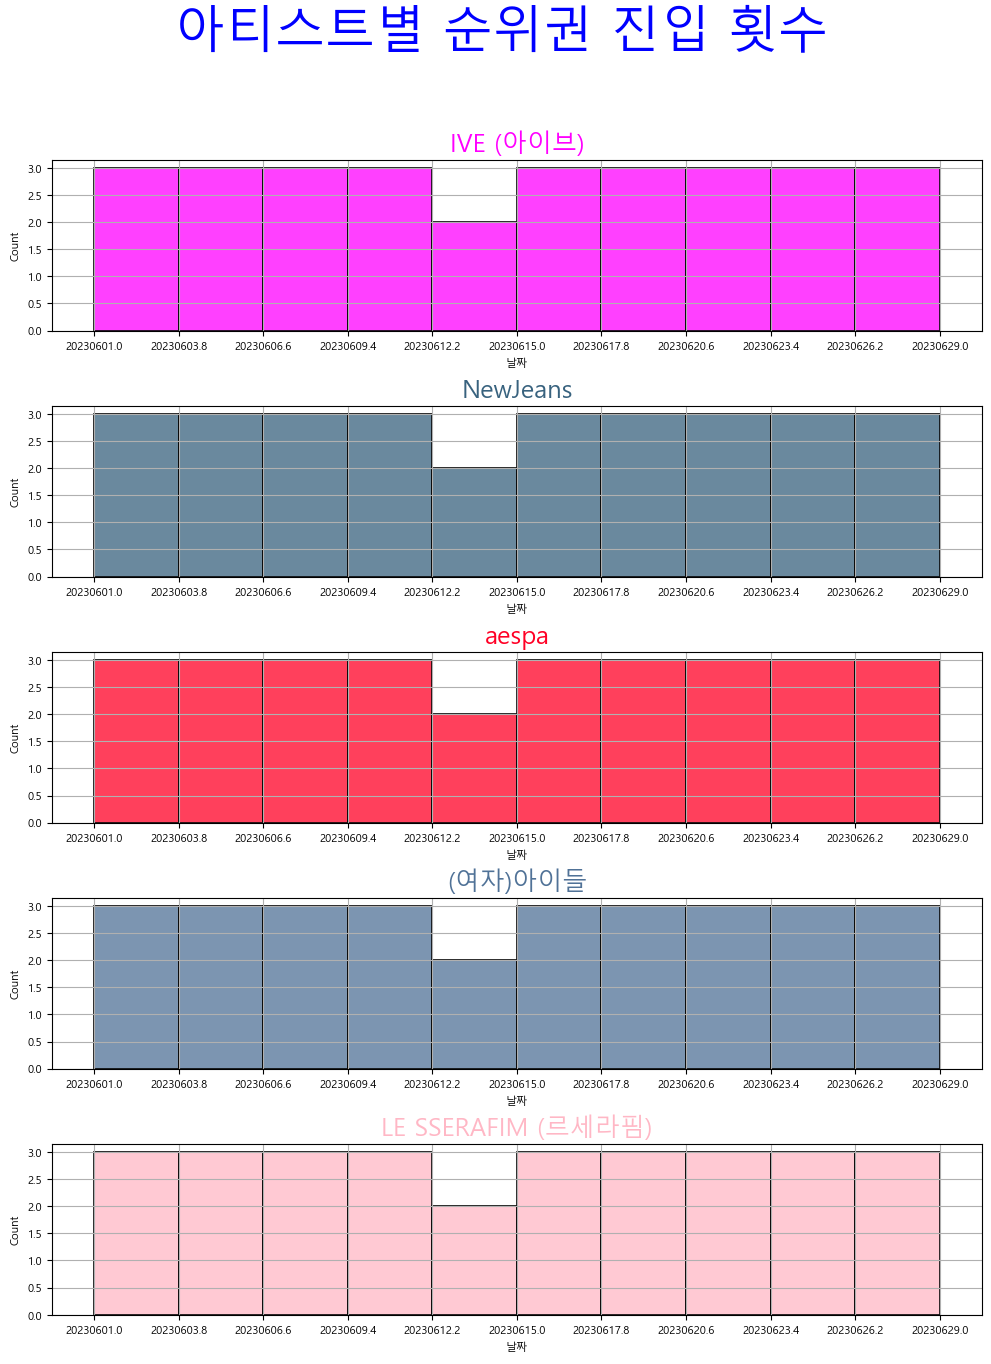

In [20]:
artists = ["IVE (아이브)", "NewJeans", "aespa", "(여자)아이들", "LE SSERAFIM (르세라핌)"]
colors = ["#FF00FF", "#38627e", "#ff0025", "#507297", "#ffb7c5"]

fig, axes = plt.subplots(len(artists), 1, figsize=(12, 15))
fig.subplots_adjust(hspace=0.44)
fig.suptitle("아티스트별 순위권 진입 횟수", fontsize=36, color='blue')

for i, artist in enumerate(artists):
    ax = axes[i]
    hist, bins = np.histogram(artist_counts.query(f"아티스트 == '{artist}'")['날짜'], bins=10)
    sb.histplot(artist_counts.query(f"아티스트 == '{artist}'")['날짜'], bins=10, edgecolor='black', linewidth=1.2, color=colors[i], ax=ax)
    ax.title.set_text(artist)
    ax.title.set_fontsize(18)
    ax.title.set_color(colors[i])
    ax.set_xticks(bins, bins)
    ax.grid()

plt.show()
plt.close()